<a href="https://colab.research.google.com/github/AhmadRafly0/Project-ML/blob/main/project_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

Dataset      : Student exam score dataset analysis

Link Dataset : (https://www.kaggle.com/datasets/grandmaster07/student-exam-score-dataset-analysis)

Dataset ini menampilkan semua informasi tentang kinerja mahasiswa dalam ujian. Skor ujian berkaitan dengan kebiasaan dan latar belakang belajar mahasiswa untuk mendukung analisis kinerja mahasiswa. Dataset ini digunakan di perguruan tinggi, sekolah, dan universitas, untuk menentukan apakah skor ujian mahasiswa lulus atau tidak.

Dataset Summary

- Rows: 200
- Columns: 6
- No missing values


Columns Description

- student_id: Setiap siswa memiliki nomor identifikasi yang unik.
- hours_studied: Jumlah jam yang dihabiskan siswa untuk belajar.
- sleep_hours: berapa banyak waktu istirahat atau tidur
- attendance_percent: persentase siswa yang menghadiri kelas dari total kelas.
- previous_scores: Nilai yang diterima siswa dalam ujian sebelumnya atau prestasi akademik siswa di masa lalu.
- exam_score: seberapa baik kinerja siswa dalam tes.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## ***Import Dataset***

In [4]:
df = pd.read_csv('student_exam_scores.csv')

## ***Exploratory Data Analysis (EDA)***

In [5]:
# Cek Data Awal
print("--- Info Dataset ---")
print(df.info())
print("\n--- Statistik Deskriptif ---")
print(df.describe())

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None

--- Statistik Deskriptif ---
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   
min         1.000000     4.000000           50.300000        40.000000   
25%         3.50

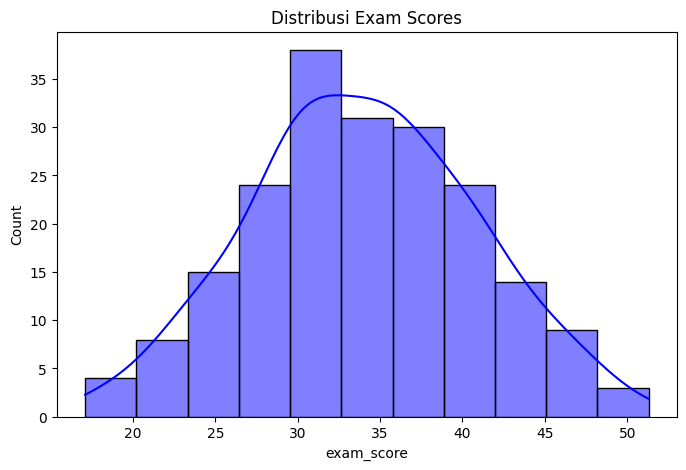

In [6]:
# Visualisasi Distribusi Target
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], kde=True, color='blue')
plt.title('Distribusi Exam Scores')
plt.show()

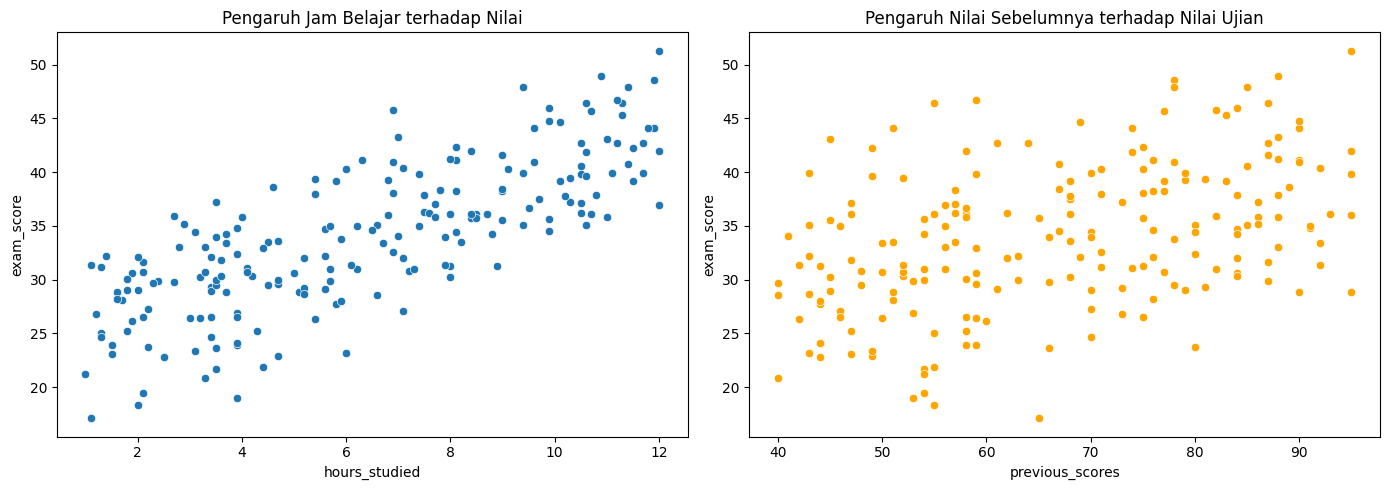

In [7]:
# Visualisasi Hubungan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hubungan Hours Studied vs Exam Score
sns.scatterplot(data=df, x='hours_studied', y='exam_score', ax=axes[0])
axes[0].set_title('Pengaruh Jam Belajar terhadap Nilai')

# Hubungan Previous Scores vs Exam Score
sns.scatterplot(data=df, x='previous_scores', y='exam_score', ax=axes[1], color='orange')
axes[1].set_title('Pengaruh Nilai Sebelumnya terhadap Nilai Ujian')

plt.tight_layout()
plt.show()

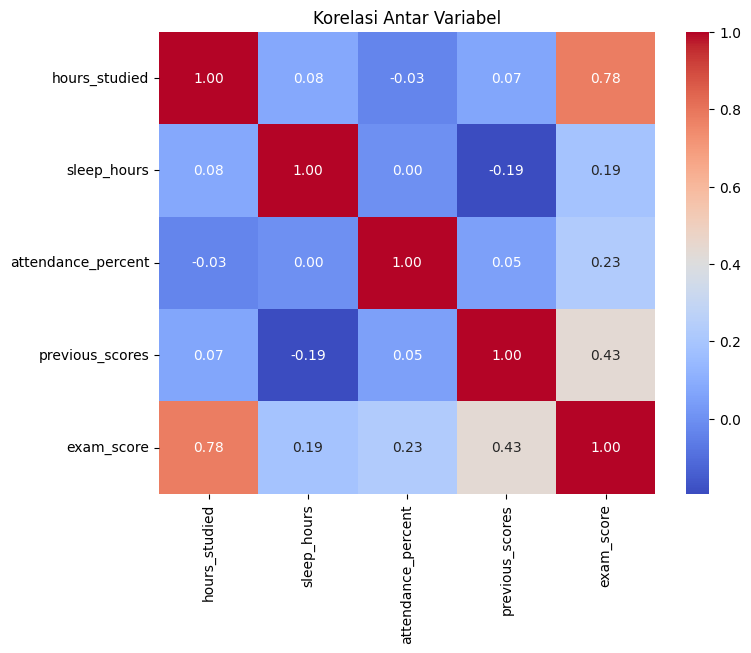

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('student_id', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

## ***Splitting train set and test set***

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']]
y = df['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### ***Scaling Data***

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***Training Model***

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

## ***Prediksi***

In [16]:
y_pred = regressor.predict(X_test_scaled)

comparison_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference (Error)': y_test - y_pred
})

print(comparison_df.head(10))

     Actual Value  Predicted Value  Difference (Error)
18           35.6        37.549621           -1.949621
170          45.3        45.571820           -0.271820
107          39.2        37.224089            1.975911
98           39.9        40.803024           -0.903024
177          31.0        34.730205           -3.730205
182          44.1        44.441381           -0.341381
5            35.7        35.569167            0.130833
146          45.8        41.591722            4.208278
12           31.2        27.464650            3.735350
152          27.7        28.719101           -1.019101


## ***Evaluasi Model***

In [23]:
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Hitung Adjusted R-Squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("="*40)
print("     METRIK EVALUASI REGRESI")
print("="*40)
print(f"1. MAE (Rata-rata Error Mutlak) : {mae:.4f}")
print(f"2. MSE (Rata-rata Error Kuadrat): {mse:.4f}")
print(f"3. RMSE (Akar Kuadrat MSE)      : {rmse:.4f}")
print("-" * 40)
print(f"4. R-Squared (R2)               : {r2:.4f}")
print(f"5. Adjusted R-Squared           : {adj_r2:.4f}")
print("="*40)

     METRIK EVALUASI REGRESI
1. MAE (Rata-rata Error Mutlak) : 2.1033
2. MSE (Rata-rata Error Kuadrat): 6.8878
3. RMSE (Akar Kuadrat MSE)      : 2.6245
----------------------------------------
4. R-Squared (R2)               : 0.8809
5. Adjusted R-Squared           : 0.8673


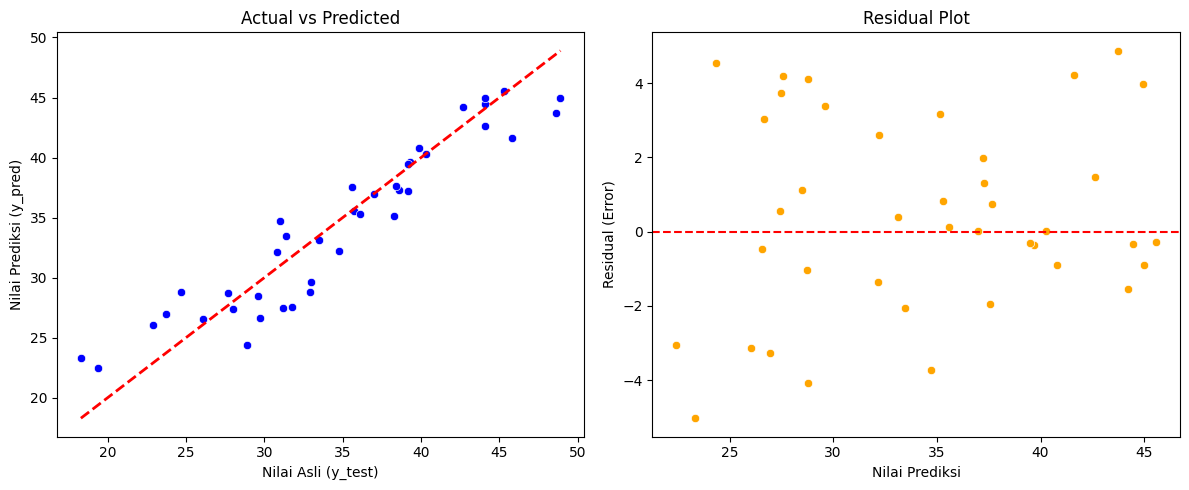

In [22]:
# Analisis Residual (Penting untuk Cek Asumsi Linearitas)
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Nilai Asli (y_test)')
plt.ylabel('Nilai Prediksi (y_pred)')

# Plot 2: Residual Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual (Error)')

plt.tight_layout()
plt.show()

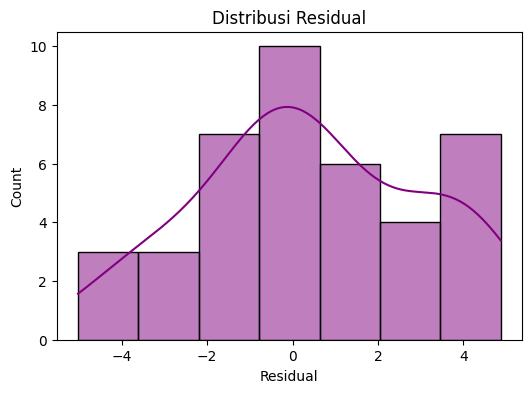

Rata-rata Residual: 0.4174


In [20]:
# Cek Normalitas Residual
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.show()

# Cek rata-rata residual
print(f"Rata-rata Residual: {np.mean(residuals):.4f}")